In [24]:
import numpy as np 
import matplotlib.pyplot as plt

In [29]:
X = np.linspace(0, l_max, N + 1)
T = np.linspace(0, T_max, M + 1)

In [30]:
def g(x, t):
    return 0

def phi(x):
    return 0

def psi(x):
    return 0

def gamma0(t):
    return t 

def gamma1(t):
    return t * (t - 1)

# Явная схема

In [31]:
print(f'Условие сходимости: {np.round(a * tau / h, 2)} < 1')

Условие сходимости: 0.4 < 1


In [32]:
lambd = (a ** 2) * (tau ** 2) / (h ** 2)

In [33]:
Y = np.zeros((N + 1, M + 1), dtype=float)
Y[::,0] = phi(X)
Y[0,::] = gamma0(T)
Y[-1,::] = gamma1(T)

In [34]:
for i in range(1, N):
    Y[i, 1] = (
        Y[i, 0] + 
        (tau ** 2) * ((a ** 2) * (Y[i - 1, 0] - 2 * Y[i, 0] + Y[i + 1, 0]) / (h ** 2) + g(X[i], T[0])) / 2 + tau * psi(X[i])
    )

In [35]:
for j in range(1, M):
    for i in range(1, N):
        Y[i, j + 1] = (
            2 * (1 - lambd) * Y[i, j] + 
            lambd * (Y[i + 1, j] + Y[i - 1, j]) -
            Y[i, j - 1]
        )

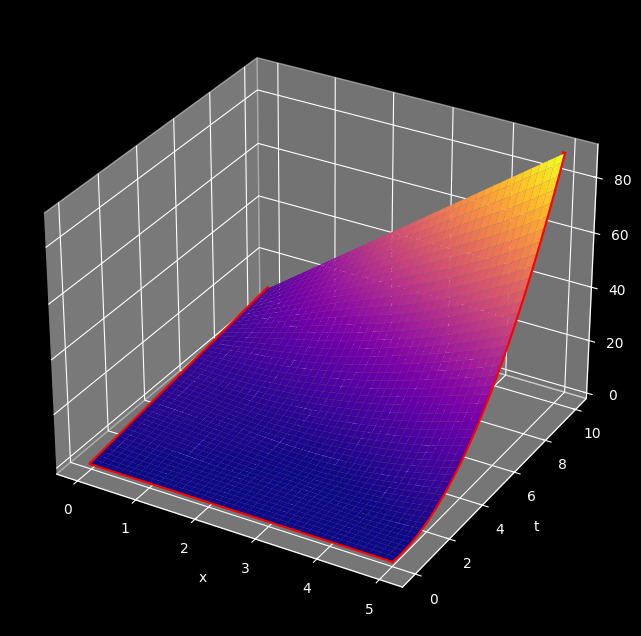

In [36]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='plasma')

# Визуализация граничных условий
t_line = np.linspace(0, T_max, 100)
x_line = np.linspace(0, 0, 100)
ax.plot(x_line, t_line, gamma0(t_line), color='red', linewidth=3)

t_line = np.linspace(0, T_max, 100)
x_line = np.linspace(l_max, l_max, 100)
ax.plot(x_line, t_line, gamma1(t_line), color='red', linewidth=3)

t_line = np.linspace(0, 0, 100)
x_line = np.linspace(0, l_max, 100)
ax.plot(x_line, t_line, [0] * len(x_line), color='red', linewidth=3)

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()

# Схема Кранка - Николсон

In [37]:
Y = np.zeros((N + 1, M + 1), dtype=float)
Y[::,0] = phi(X)
Y[0,::] = gamma0(T)
Y[-1,::] = gamma1(T)

In [38]:
lambd = (a ** 2) * (tau ** 2) / (2 * (h ** 2))

In [39]:
for j in range(1, M):
    A = np.zeros((N + 1, N + 1))
    b = np.zeros(N + 1)

    A[0, 0] = A[-1, -1] = 1
    b[0] = gamma0(T[j + 1])
    b[-1] = gamma1(T[j + 1])

    for i in range(1, N):
        A[i, i - 1] = A[i, i + 1] = lambd
        A[i, i] = - 1 - 2 * lambd

        b[i] = (
            (1 + 2 * lambd) * Y[i, j - 1] -
            lambd * (Y[i + 1, j - 1] + Y[i - 1, j - 1]) - 
            2 * Y[i, j]
        )

    Y[::, j + 1] = np.linalg.solve(A, b)

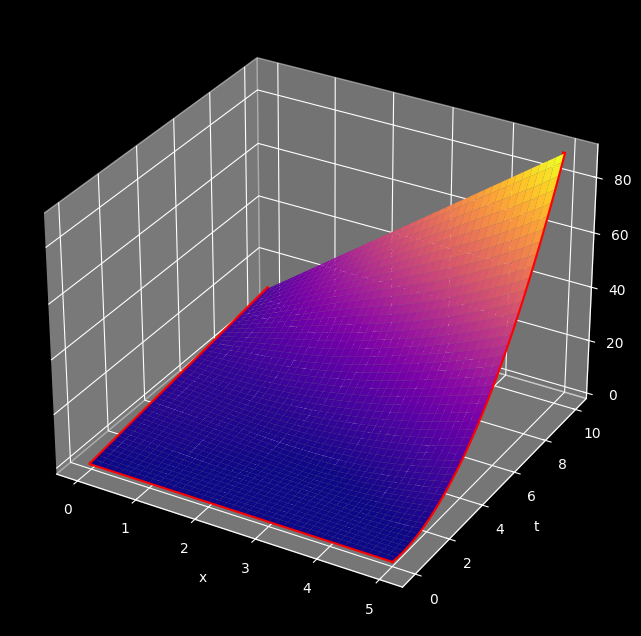

In [40]:
fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

X_g, T_g = np.meshgrid(X, T)

ax.plot_surface(X_g, T_g, Y.T, cmap='plasma')

# Визуализация граничных условий
t_line = np.linspace(0, T_max, 100)
x_line = np.linspace(0, 0, 100)
ax.plot(x_line, t_line, gamma0(t_line), color='red', linewidth=3)

t_line = np.linspace(0, T_max, 100)
x_line = np.linspace(l_max, l_max, 100)
ax.plot(x_line, t_line, gamma1(t_line), color='red', linewidth=3)

t_line = np.linspace(0, 0, 100)
x_line = np.linspace(0, l_max, 100)
ax.plot(x_line, t_line, [0] * len(x_line), color='red', linewidth=3)

ax.set_xlabel('x')
ax.set_ylabel('t')

plt.show()